!pip install pingouin

!pip install scikit-plot

# Baseball case study

## Statement

#### This dataset contains data from a 2014 Major League Baseball season.from this dataset we have to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

# Input features.

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

# Output:

Number of predicted wins (W)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pingouin as pg
import scikitplot as skplt

In [2]:
data=pd.read_csv('baseball.csv')

In [3]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Renaming columns for better understaning during data analysis.(EDA)

In [4]:
data.rename({'R':'runs','AB':'at_bats','H':'Hits','2B':'Doubles','3B':'Triples','HR':'Homeruns','BB':'Walk','SO':'strikeout',
             'SB':'stolen_base','RA':'runs_allowed','ER':'earned_runs','ERA':'earned_run_avg','CG':'Complete Games','SHO':'shoutout','SV':'saves',
             'E':'error','W':'no_of_predicted_wins'},axis=1,inplace=True)

In [5]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [6]:
data['no_of_predicted_wins'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [7]:
data.shape

(30, 17)

In [8]:
data.isna().sum()

no_of_predicted_wins    0
runs                    0
at_bats                 0
Hits                    0
Doubles                 0
Triples                 0
Homeruns                0
Walk                    0
strikeout               0
stolen_base             0
runs_allowed            0
earned_runs             0
earned_run_avg          0
Complete Games          0
shoutout                0
saves                   0
error                   0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_predicted_wins  30 non-null     int64  
 1   runs                  30 non-null     int64  
 2   at_bats               30 non-null     int64  
 3   Hits                  30 non-null     int64  
 4   Doubles               30 non-null     int64  
 5   Triples               30 non-null     int64  
 6   Homeruns              30 non-null     int64  
 7   Walk                  30 non-null     int64  
 8   strikeout             30 non-null     int64  
 9   stolen_base           30 non-null     int64  
 10  runs_allowed          30 non-null     int64  
 11  earned_runs           30 non-null     int64  
 12  earned_run_avg        30 non-null     float64
 13  Complete Games        30 non-null     int64  
 14  shoutout              30 non-null     int64  
 15  saves                 30 

In [10]:
data.describe()


,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# statistical analysis

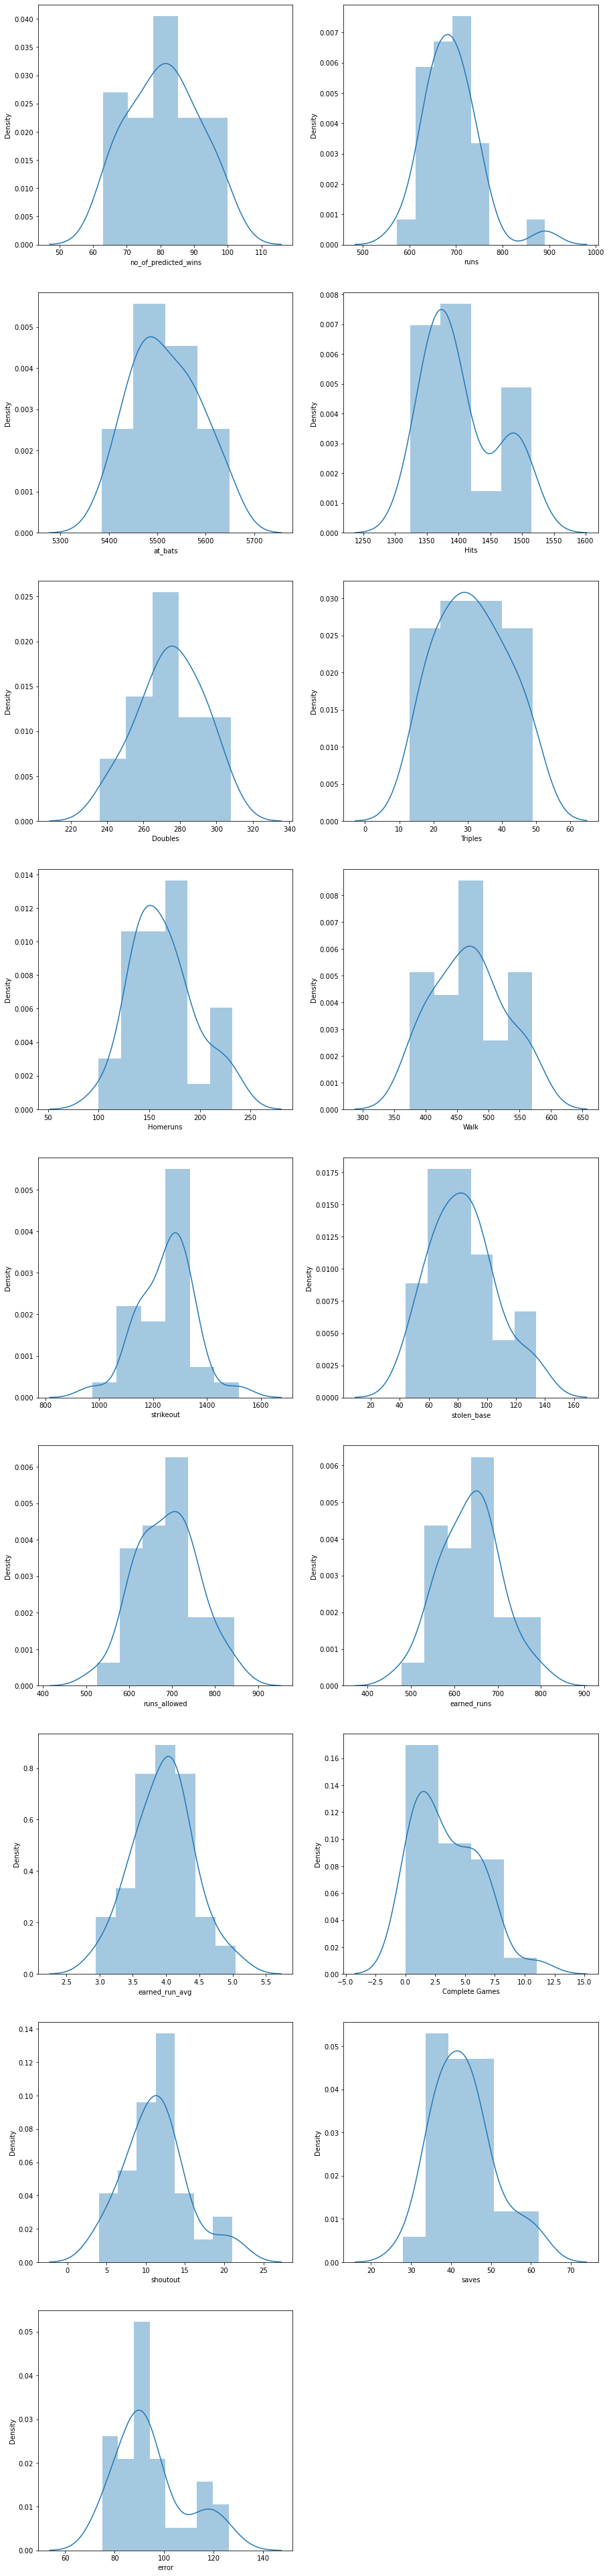

In [11]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  sns.distplot(data[i[1]])

In [12]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

In [13]:
col=['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']

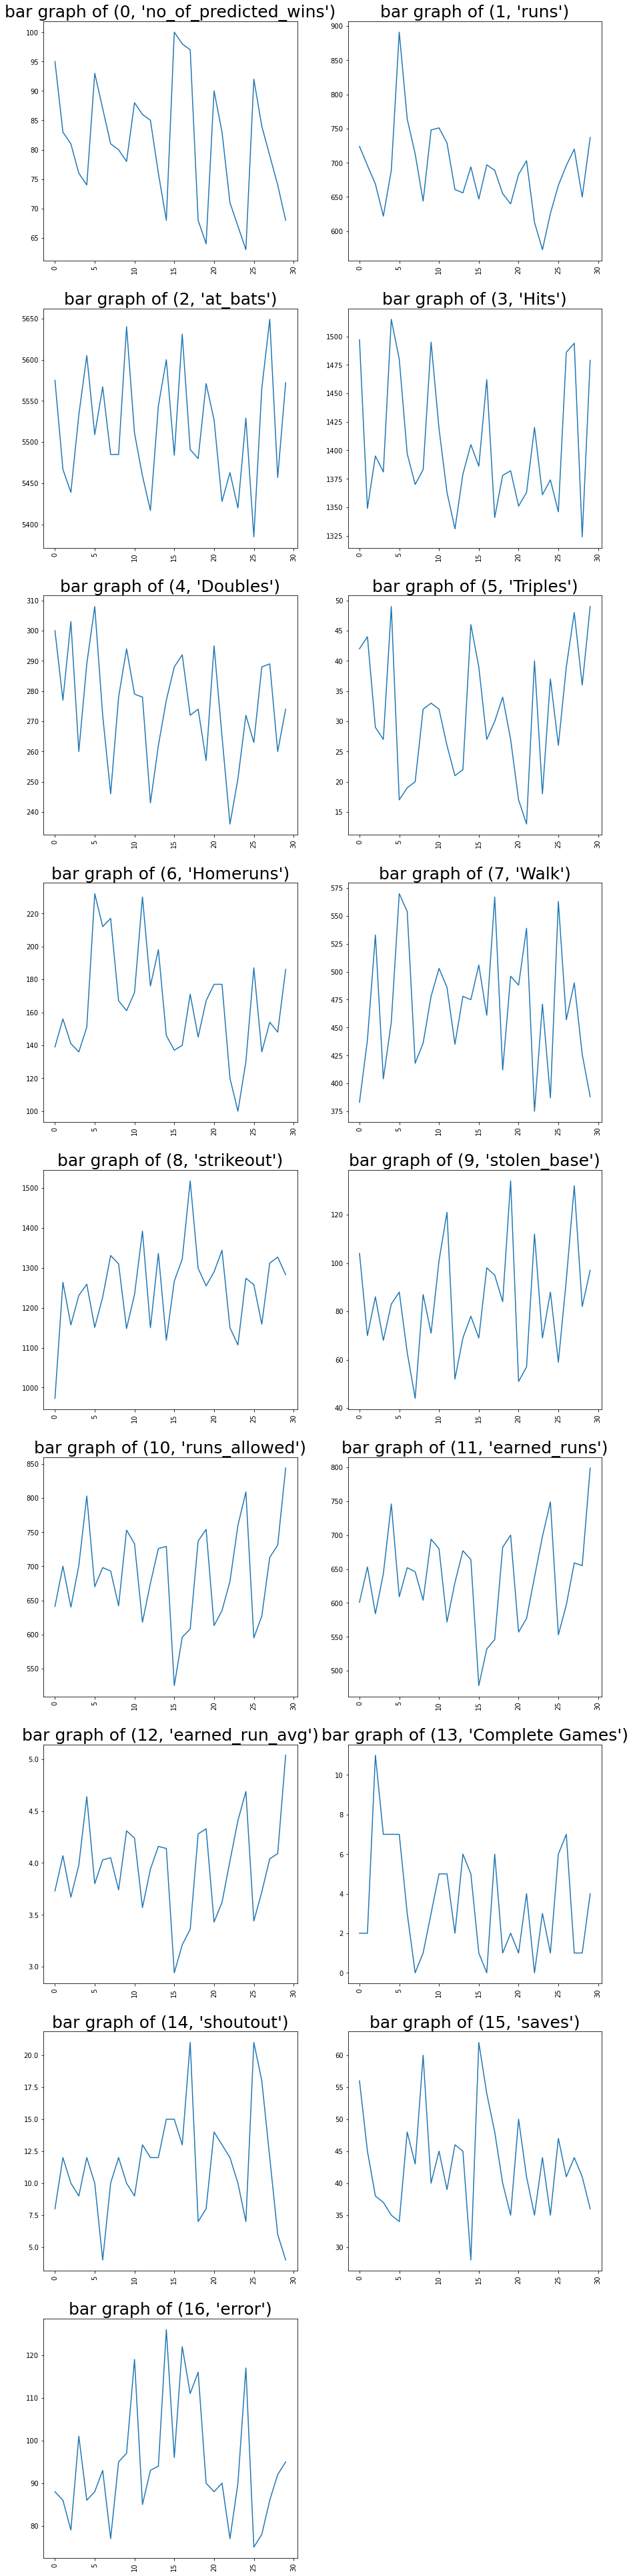

In [14]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  plt.plot(data[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"bar graph of {i}",fontsize=25)

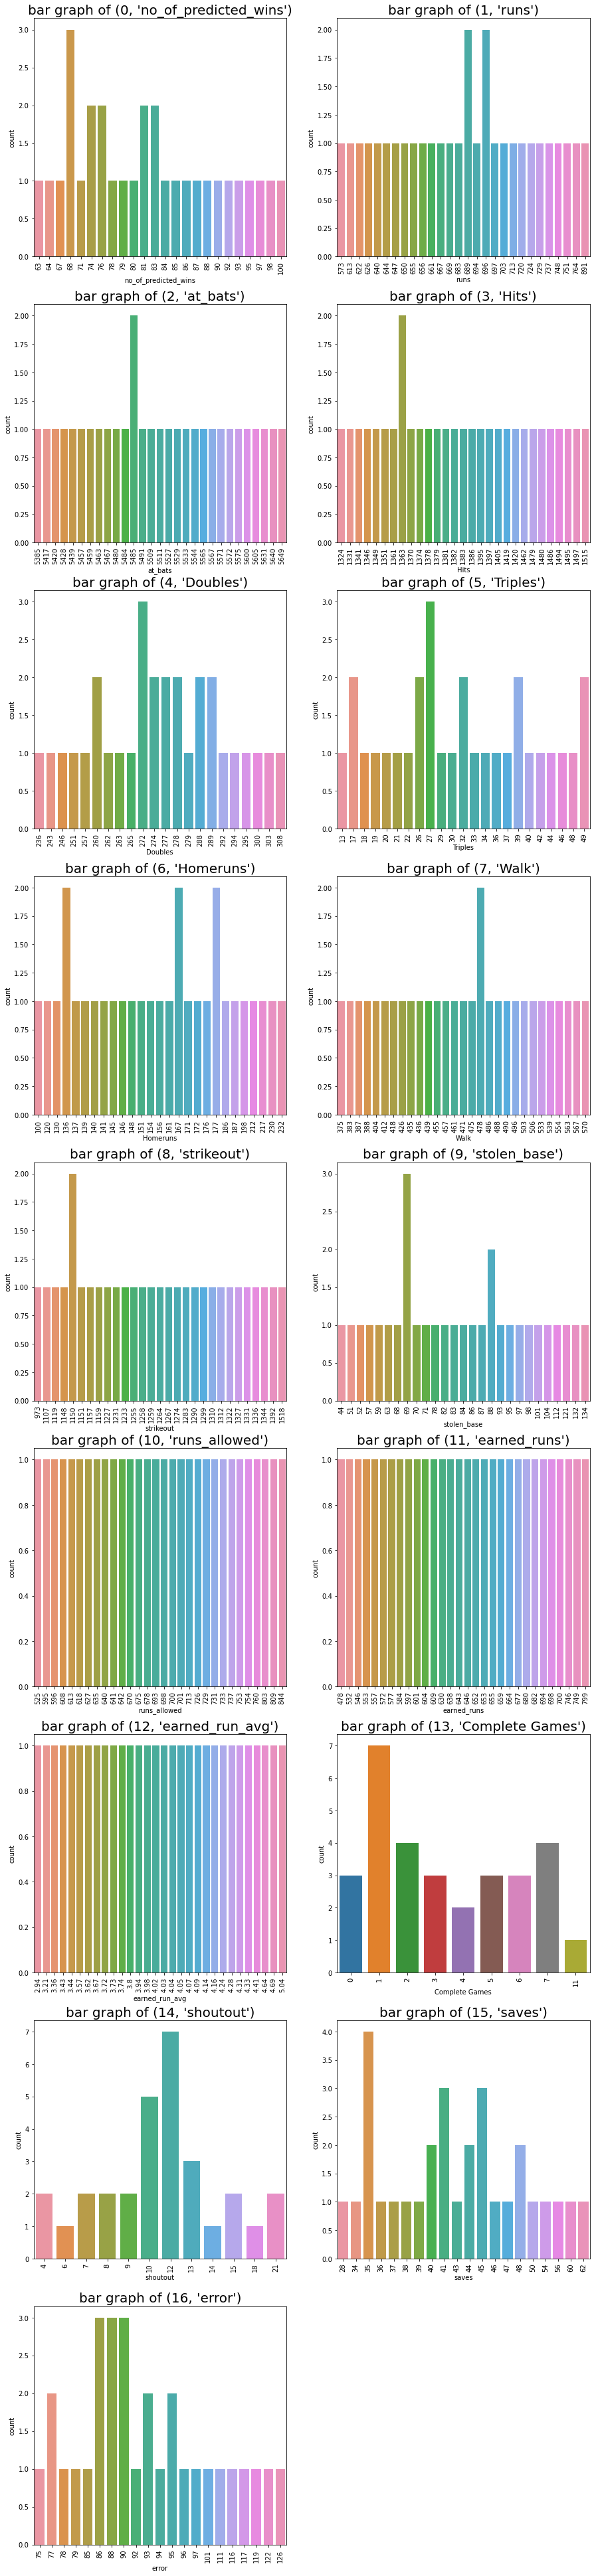

In [15]:
plt.figure(figsize=(15,70))
for i in enumerate(data):
  plt.subplot(9,2,i[0]+1)
  sns.countplot(data[i[1]])
  plt.xticks(rotation=90)
  plt.title(f"bar graph of {i}",fontsize=20)

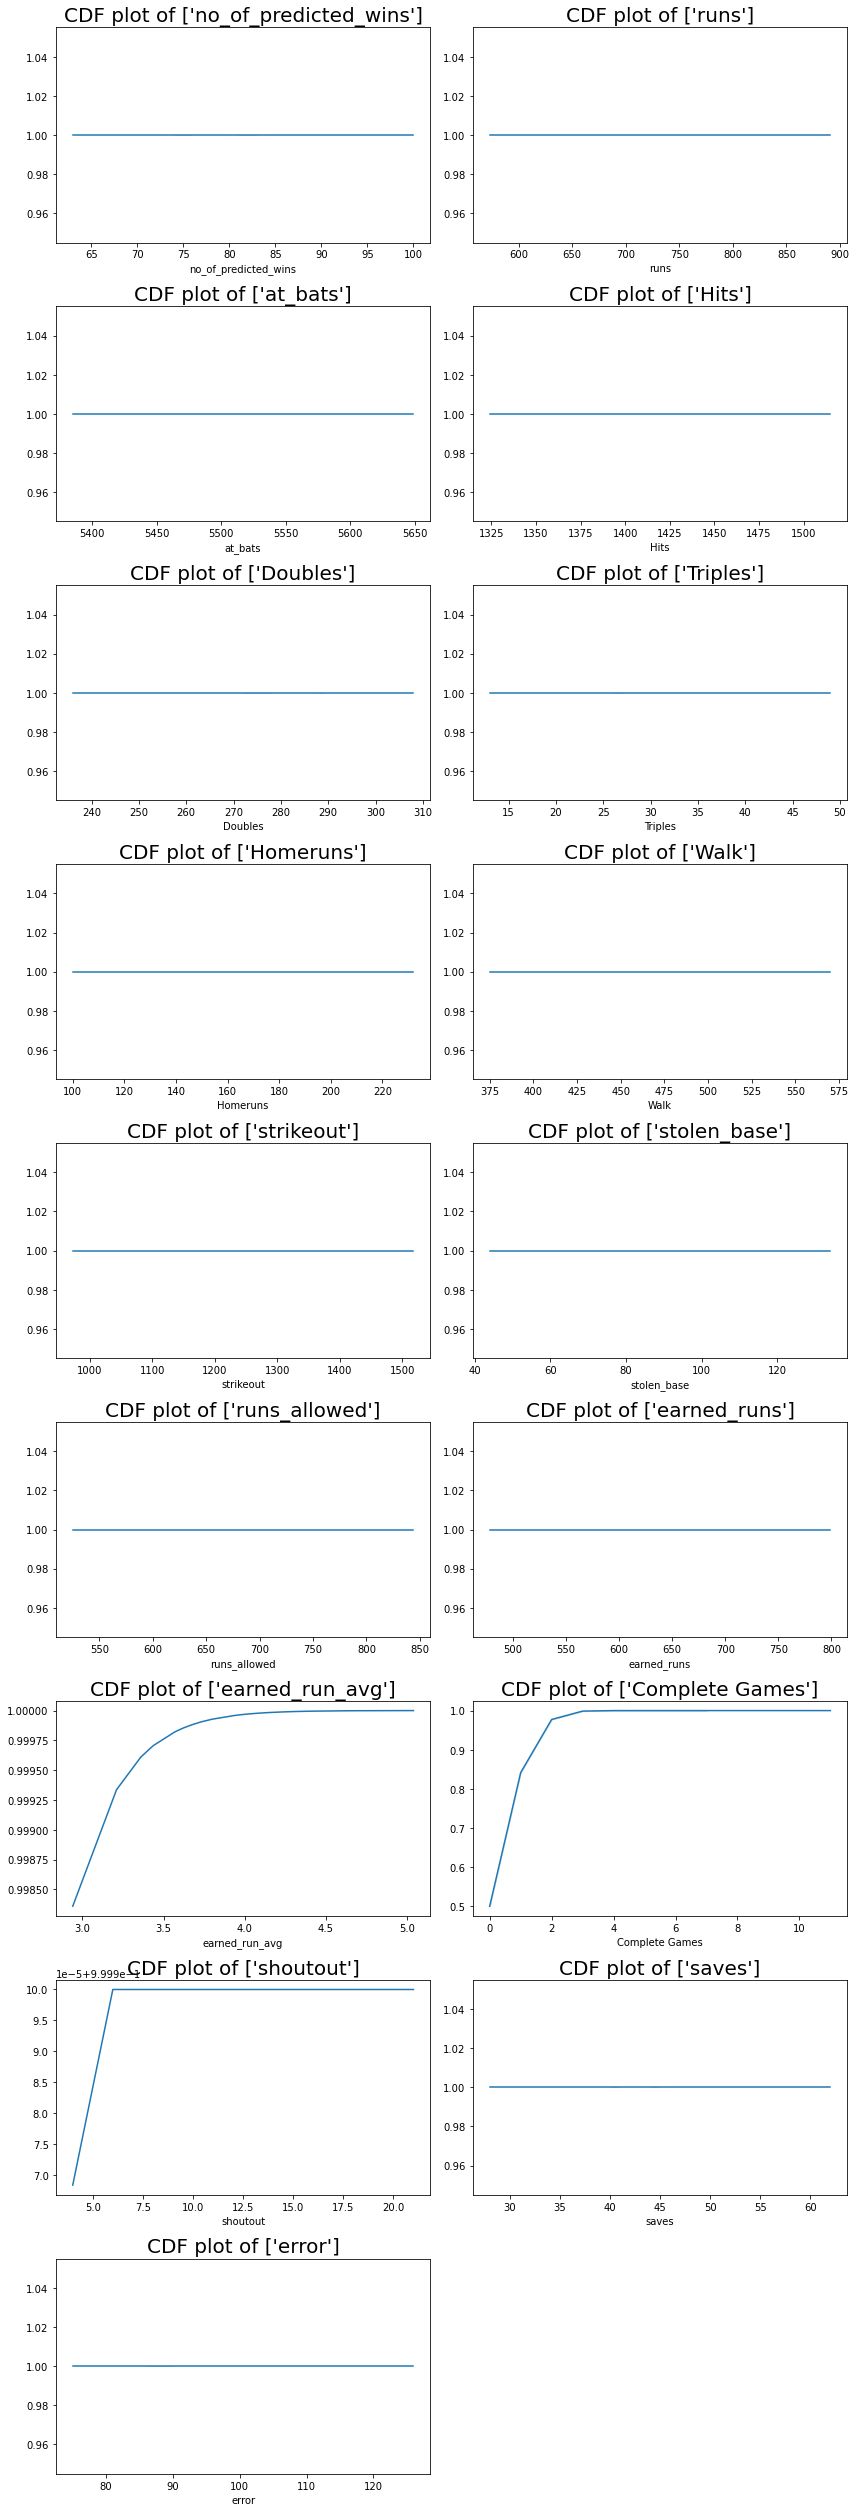

In [16]:
plt.figure(figsize=(12,35))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)

  sns.lineplot(x=data[col[i]],y=norm.cdf(data[col[i]]))
  plt.title(f"CDF plot of {[col[i]]}",fontsize=20)
  plt.tight_layout()

# quantitative analysis

In [17]:
col=['runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error']

In [18]:
df=data[col]

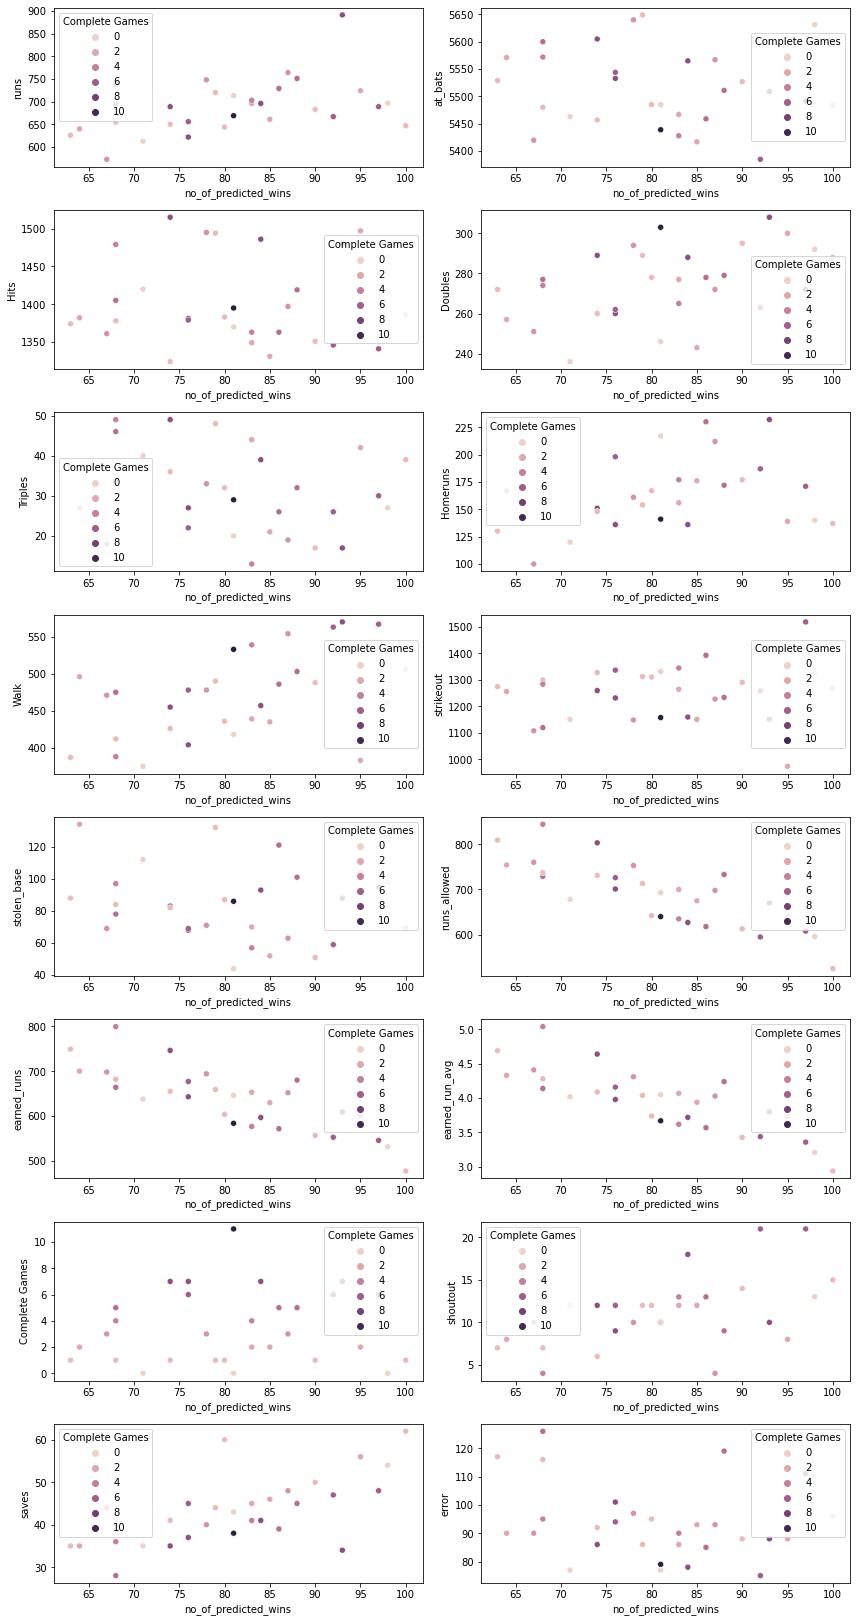

In [19]:
plt.figure(figsize=(12,25))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.scatterplot(x=data.no_of_predicted_wins,y=data[col[i]],hue=data['Complete Games'])
  plt.tight_layout()


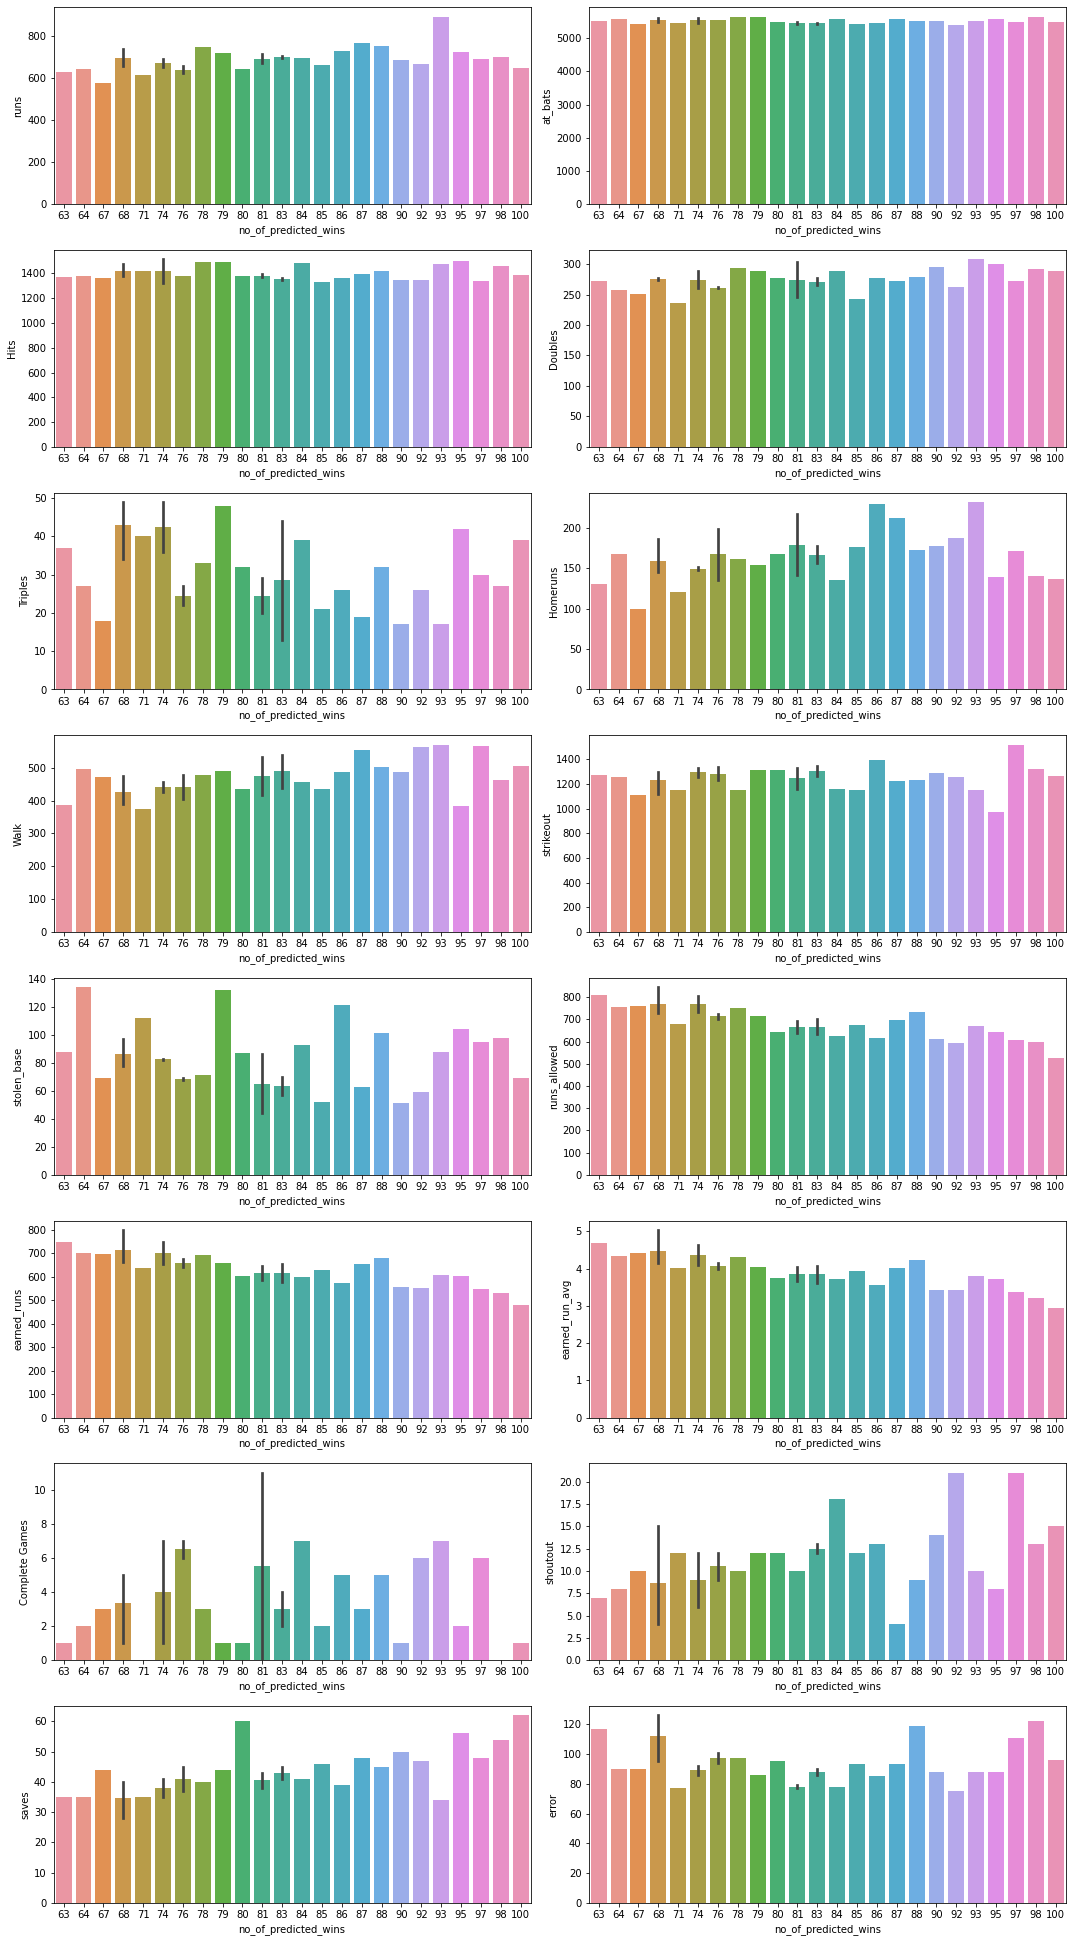

In [20]:
plt.figure(figsize=(15,30))
for i in range(0,len(col)):
  plt.subplot(9,2,i+1)
  sns.barplot(x=data.no_of_predicted_wins,y=data[col[i]])
  plt.tight_layout()

In [21]:
data1=data.groupby('no_of_predicted_wins')['runs'].max()
data1=data1.reset_index()
data1=data1.sort_values(by=('no_of_predicted_wins'),ascending=True)

# Top 10 'no of predicted wins' vs 'runs' to show us when the no.of predicted wins increase how much runs was there.

Text(0.5, 1.0, 'Top 10 No. of predicted wins')

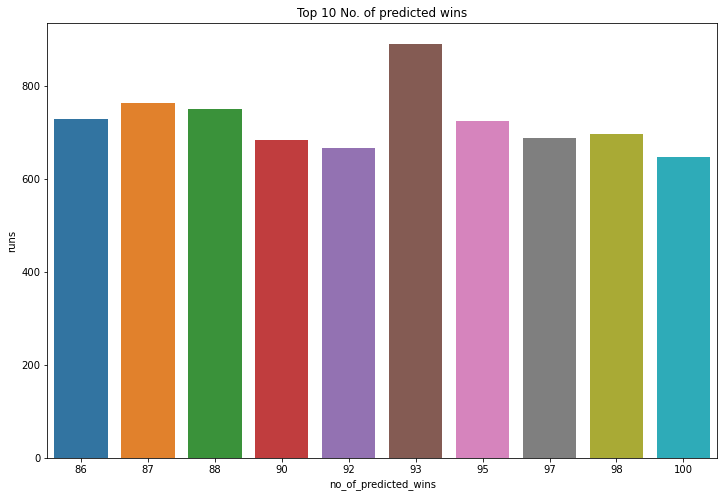

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='no_of_predicted_wins',data=data1.tail(10))
plt.title("Top 10 No. of predicted wins")

# least 10 'no of predicted wins' vs 'runs' to show us when the no.of predicted wins increase how much runs was there.

Text(0.5, 1.0, 'Least 10 No. of predicted wins')

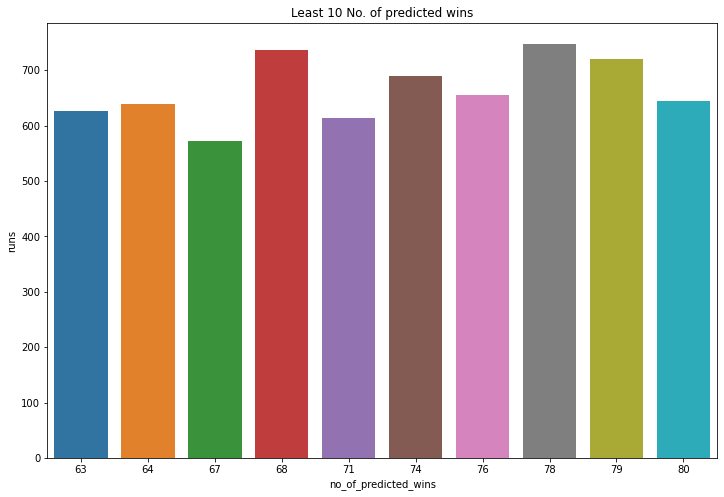

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(y='runs',x='no_of_predicted_wins',data=data1.head(10))
plt.title("Least 10 No. of predicted wins")

In [24]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [25]:
data2=data.groupby('no_of_predicted_wins')['Hits'].max()
data2=data2.reset_index()
data2=data2.sort_values(by=('no_of_predicted_wins'),ascending=False)

# Top hits when no.of predicted wins was high

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

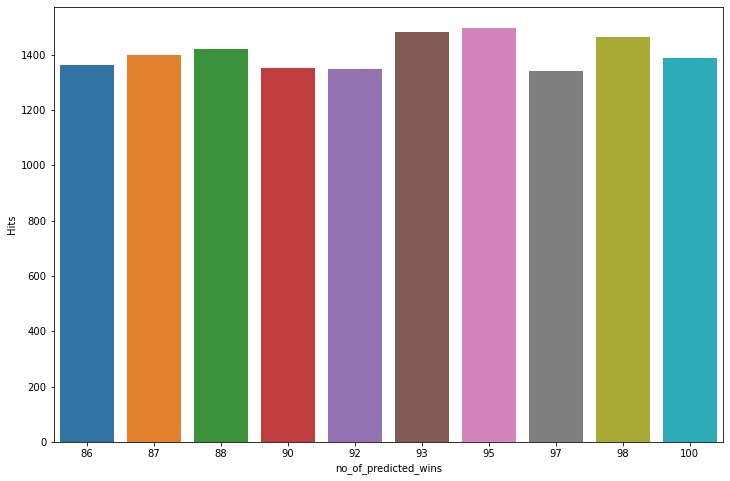

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x='no_of_predicted_wins',y='Hits',data=data2.head(10))

# Top hits when no.of predicted wins was less

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

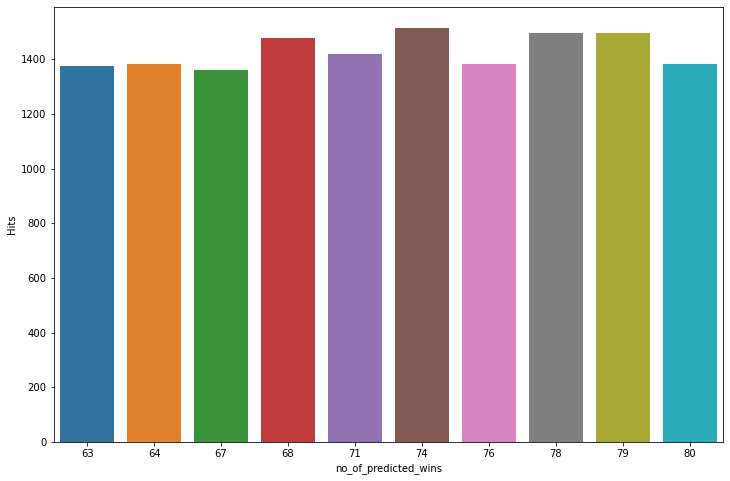

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x='no_of_predicted_wins',y='Hits',data=data2.tail(10))

In [28]:
data3=data.set_index('no_of_predicted_wins')

# 'earned runs' and 'runs' as per no. of prediction wins

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='earned_runs'>

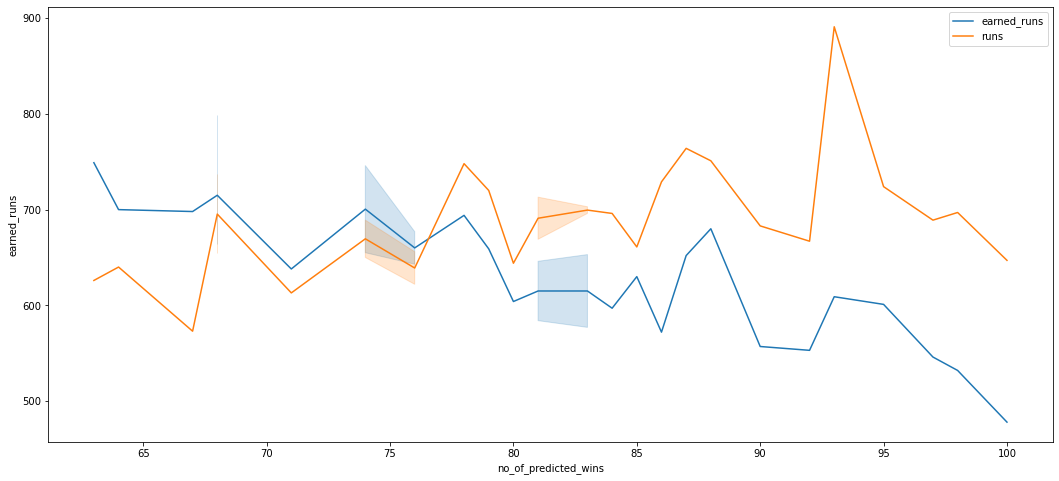

In [29]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data3['earned_runs'],label='earned_runs')
sns.lineplot(data=data3['runs'],label='runs')

# hits as per no of prediction

<AxesSubplot:xlabel='no_of_predicted_wins', ylabel='Hits'>

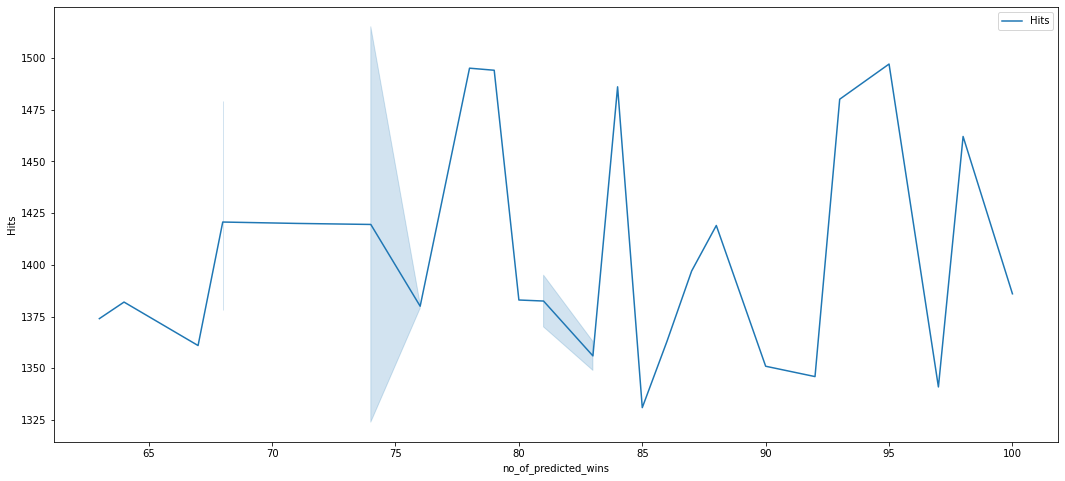

In [30]:
plt.figure(figsize=(18,8))
sns.lineplot(data=data3['Hits'],label='Hits')

In [31]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

# Distribution and relationship between variables with pairplot

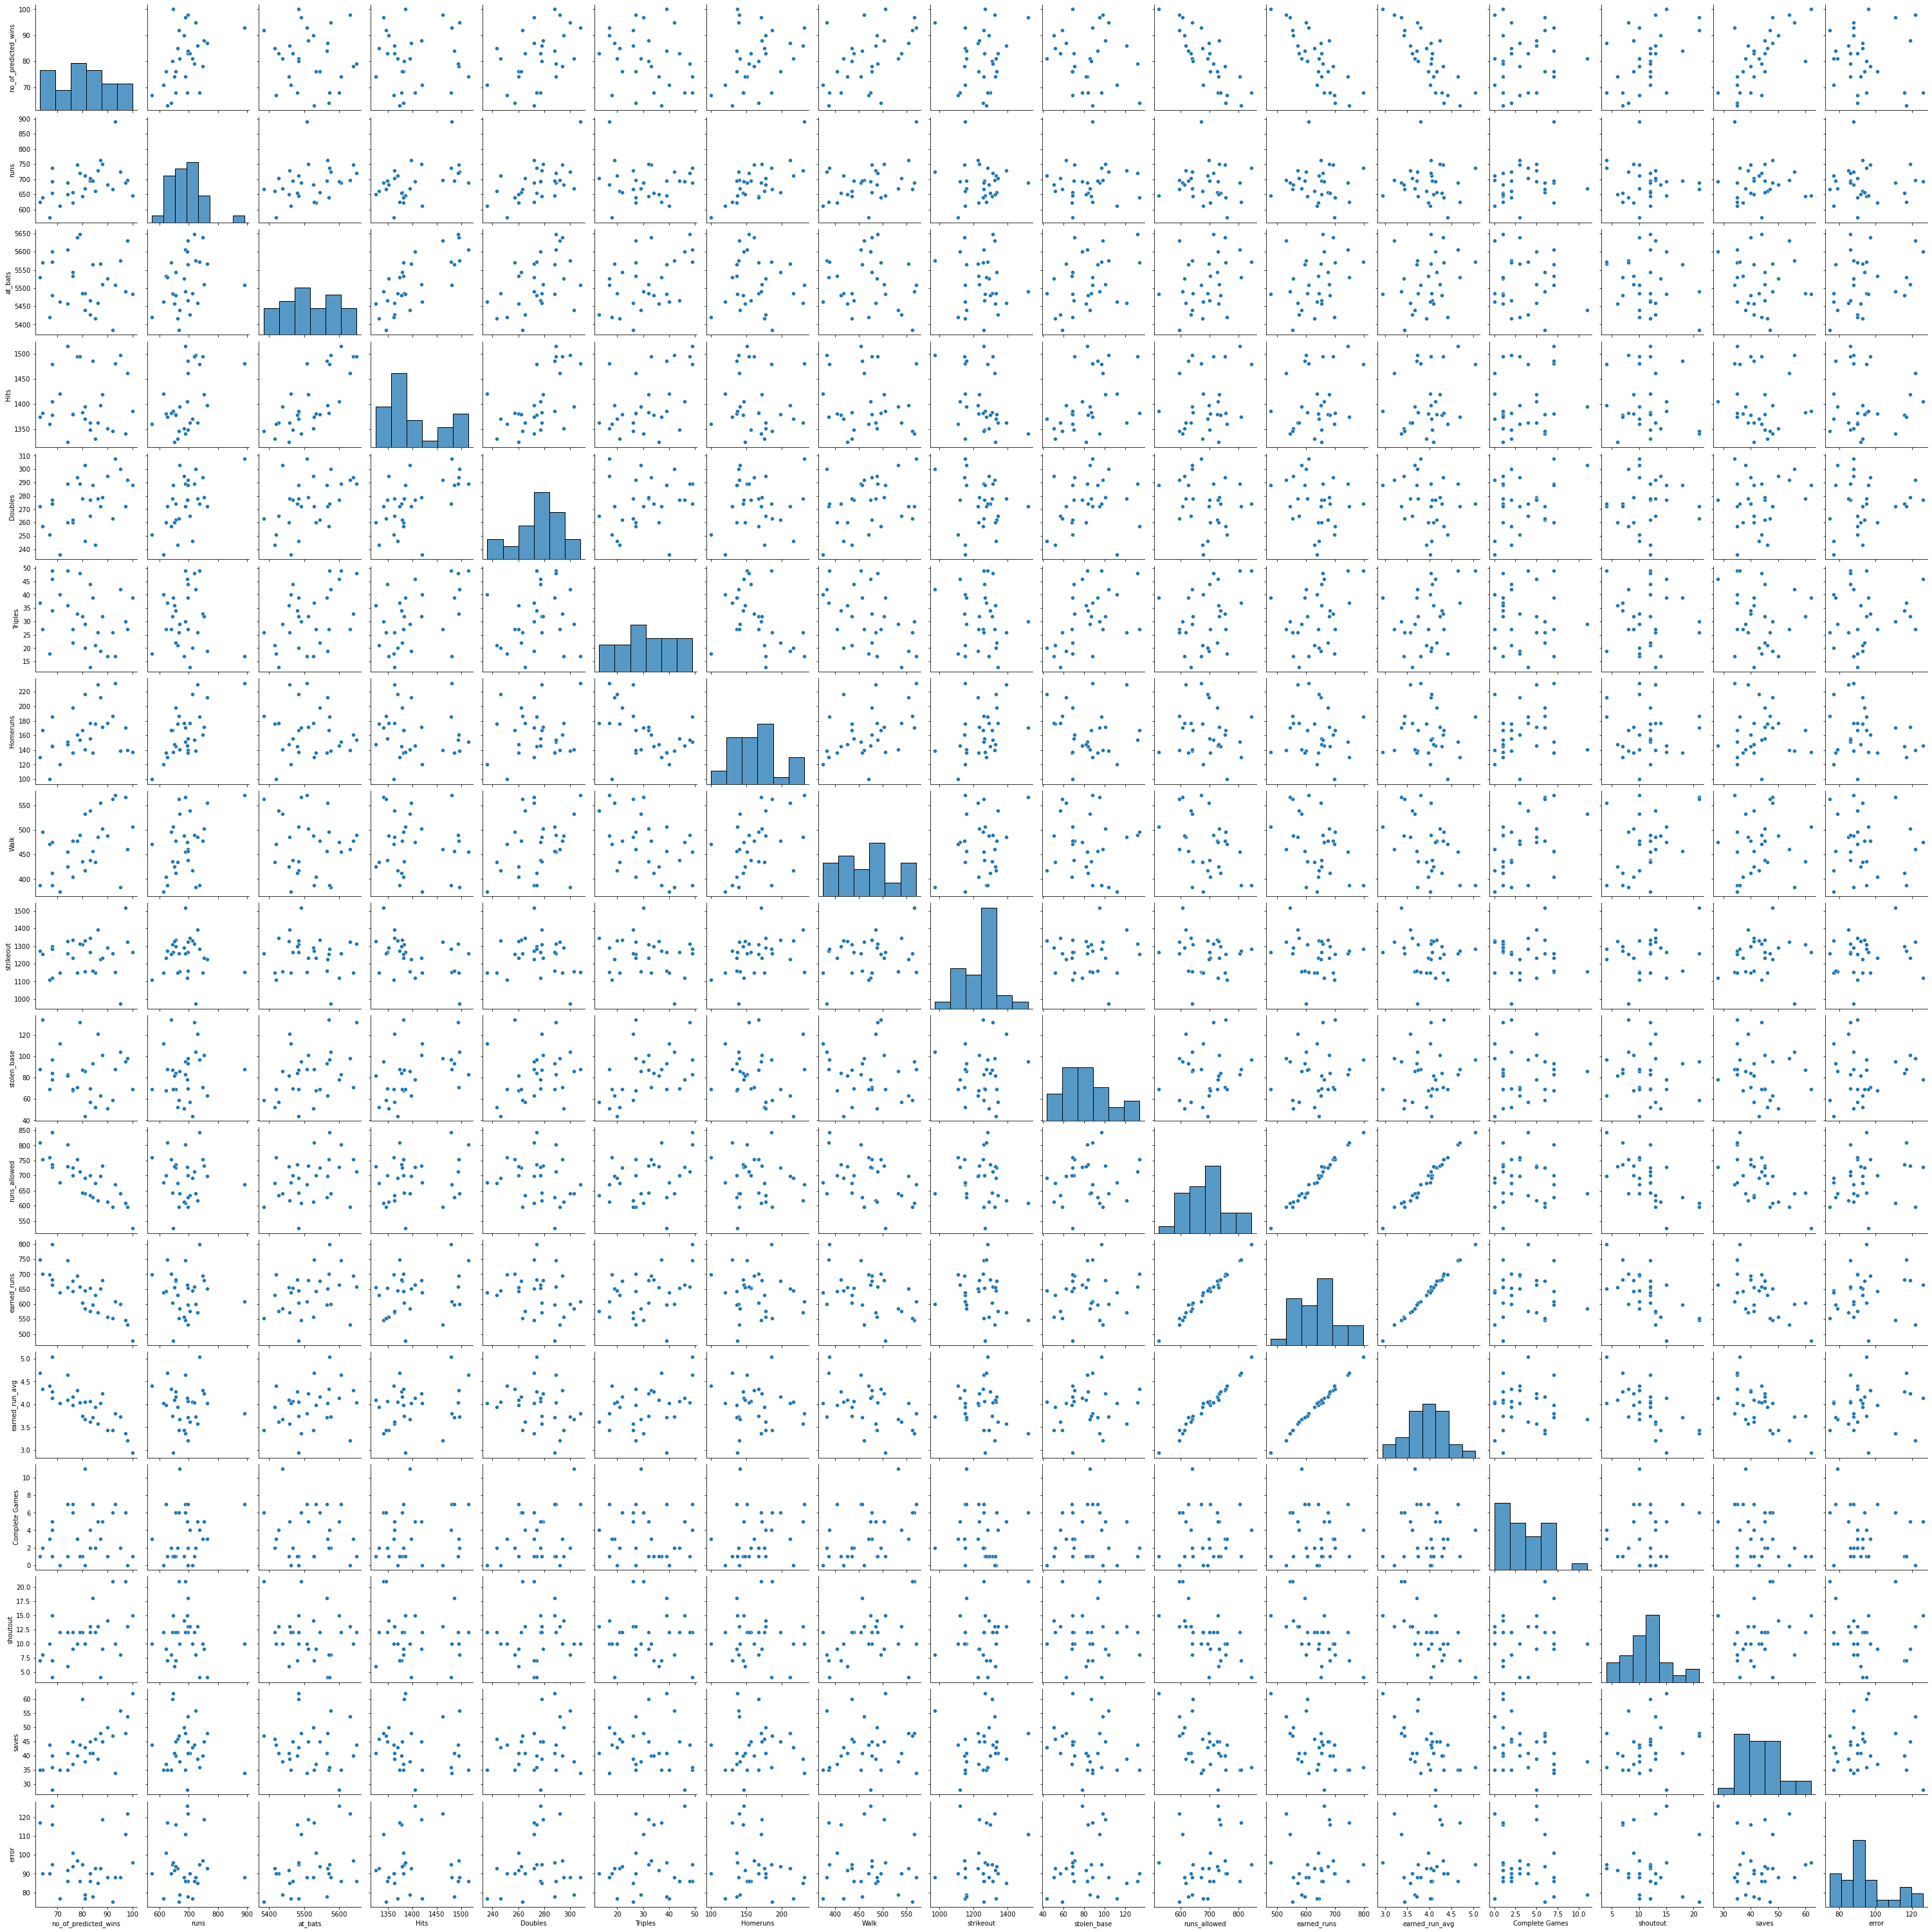

In [32]:
sns.pairplot(data)

# From pairplot linear relationship of features with target column can be easily understood

In [33]:
data.head()

,no_of_predicted_wins,runs,at_bats,Hits,Doubles,Triples,Homeruns,Walk,strikeout,stolen_base,runs_allowed,earned_runs,earned_run_avg,Complete Games,shoutout,saves,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [34]:
data.columns

Index(['no_of_predicted_wins', 'runs', 'at_bats', 'Hits', 'Doubles', 'Triples',
       'Homeruns', 'Walk', 'strikeout', 'stolen_base', 'runs_allowed',
       'earned_runs', 'earned_run_avg', 'Complete Games', 'shoutout', 'saves',
       'error'],
      dtype='object')

In [35]:
X=data.drop(['no_of_predicted_wins'],axis=1)
y=data['no_of_predicted_wins']

# Linear Regression test

In [36]:
pg.linear_regression(X,y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,155.023133,154.836238,1.001207,0.334999,0.949726,0.88785,-179.480222,489.526488
1,runs,0.136594,0.037552,3.637429,0.003009,0.949726,0.88785,0.055467,0.217720
2,at_bats,-0.019794,0.033658,-0.588100,0.566542,0.949726,0.88785,-0.092507,0.052919
3,Hits,-0.000334,0.036103,-0.009250,0.992760,0.949726,0.88785,-0.078329,0.077662
4,Doubles,-0.120384,0.072022,-1.671486,0.118509,0.949726,0.88785,-0.275979,0.035210
5,Triples,0.023095,0.112880,0.204594,0.841058,0.949726,0.88785,-0.220768,0.266957
6,Homeruns,-0.069393,0.064855,-1.069977,0.304094,0.949726,0.88785,-0.209504,0.070717
7,Walk,-0.027957,0.022229,-1.257704,0.230622,0.949726,0.88785,-0.075980,0.020065
8,strikeout,0.002115,0.010204,0.207303,0.838986,0.949726,0.88785,-0.019928,0.024159
9,stolen_base,-0.014736,0.041316,-0.356663,0.727067,0.949726,0.88785,-0.103995,0.074523


<AxesSubplot:>

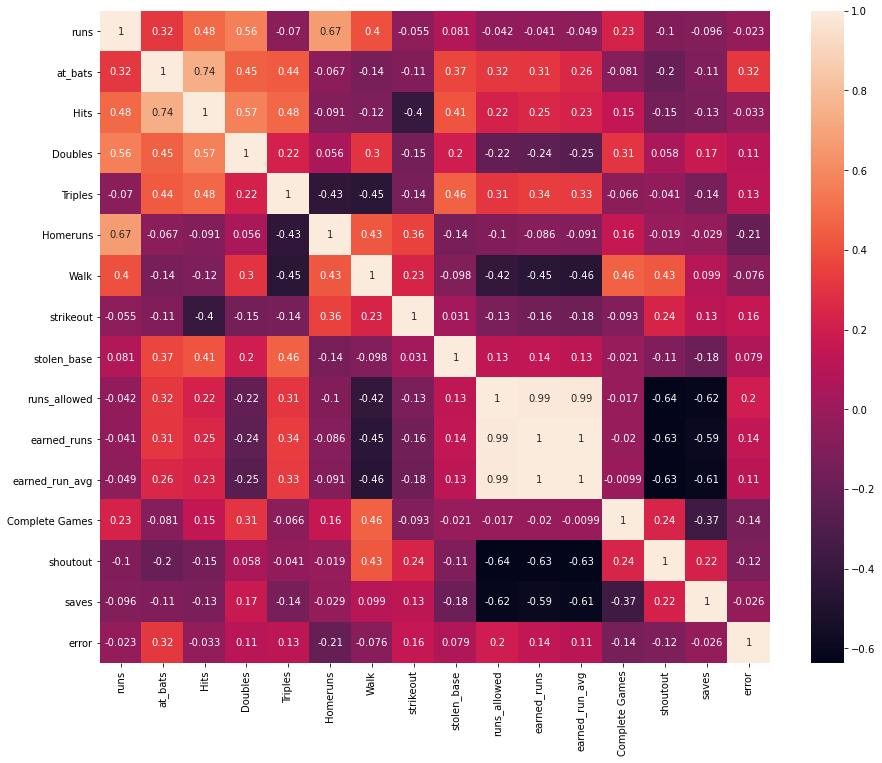

In [37]:
X_corr=X.corr()
plt.figure(figsize=(15,12))
sns.heatmap(X_corr,annot=True)

In [38]:
X=X.drop(['earned_runs'],axis=1)

# Checking For Outliers

<AxesSubplot:xlabel='variable', ylabel='value'>

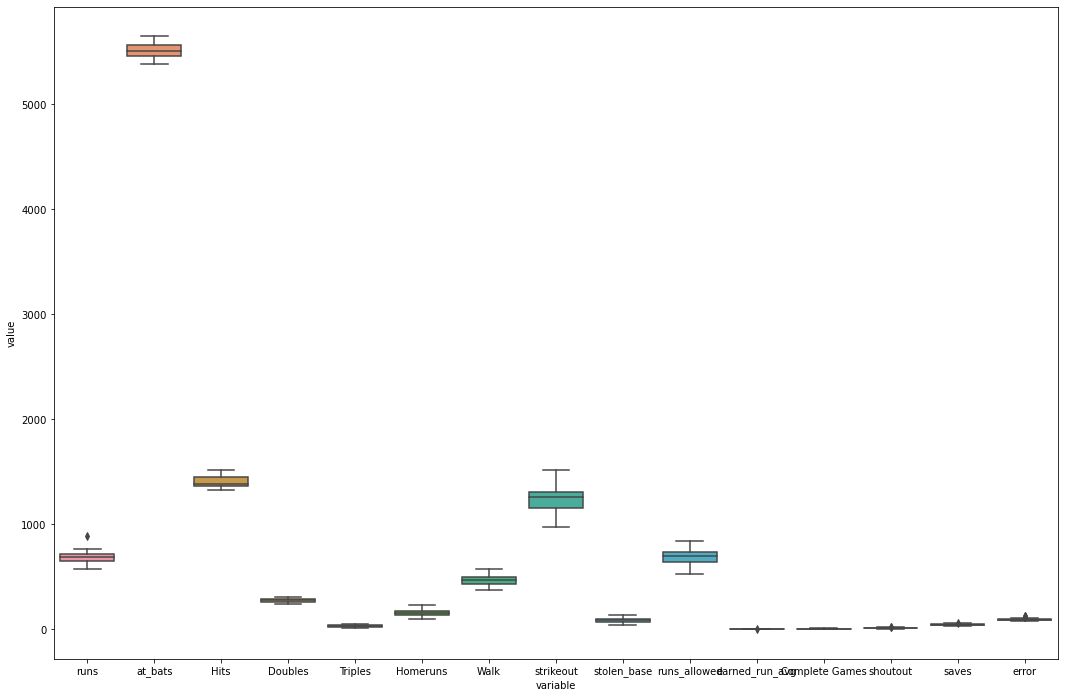

In [39]:
plt.figure(figsize=(18,12))
sns.boxplot(x='variable',y='value',data=pd.melt(X))

# Before removing outliers

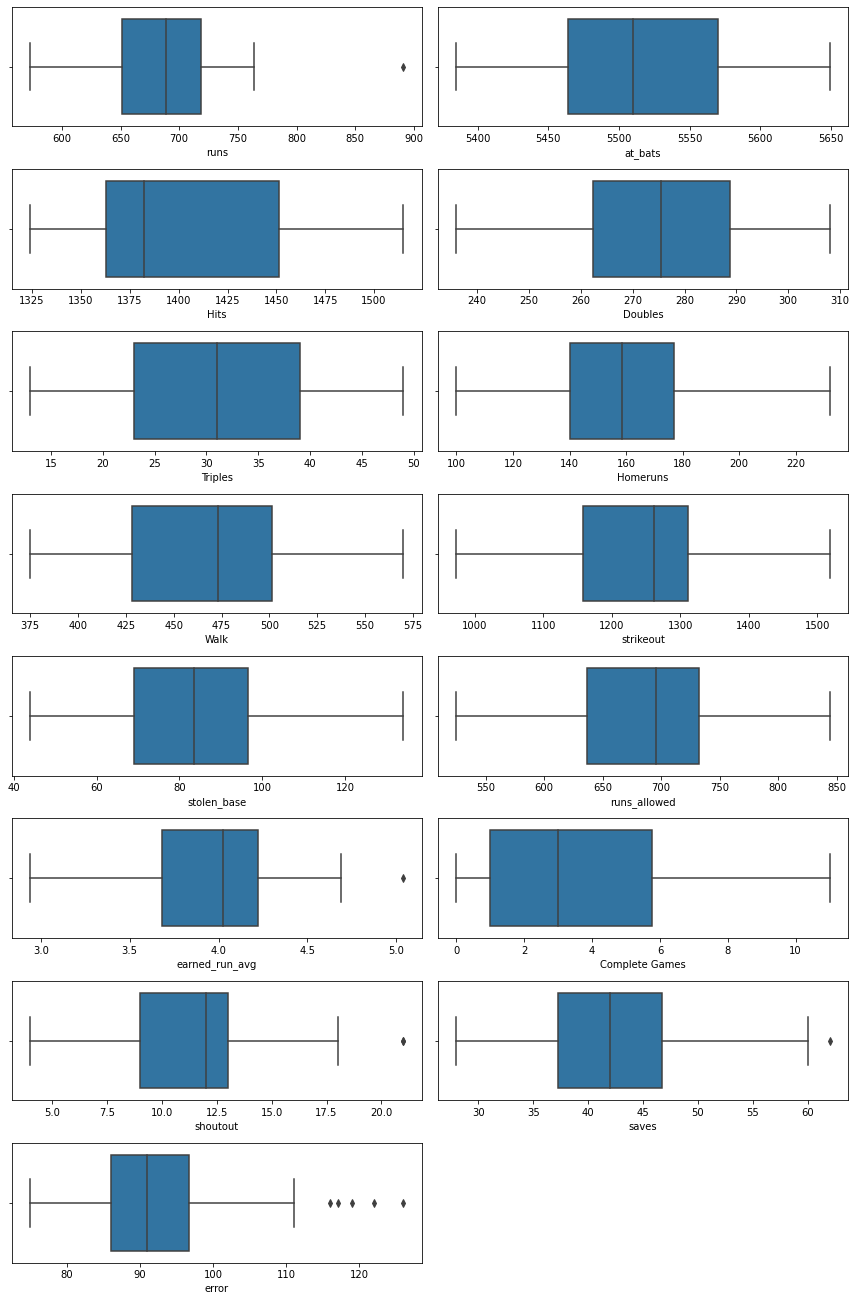

In [40]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

# Removing few outliers present in model.

In [41]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]] = percentile[0]
  X[col][X[col]>=percentile[1]] = percentile[1]

# After removal of outliers

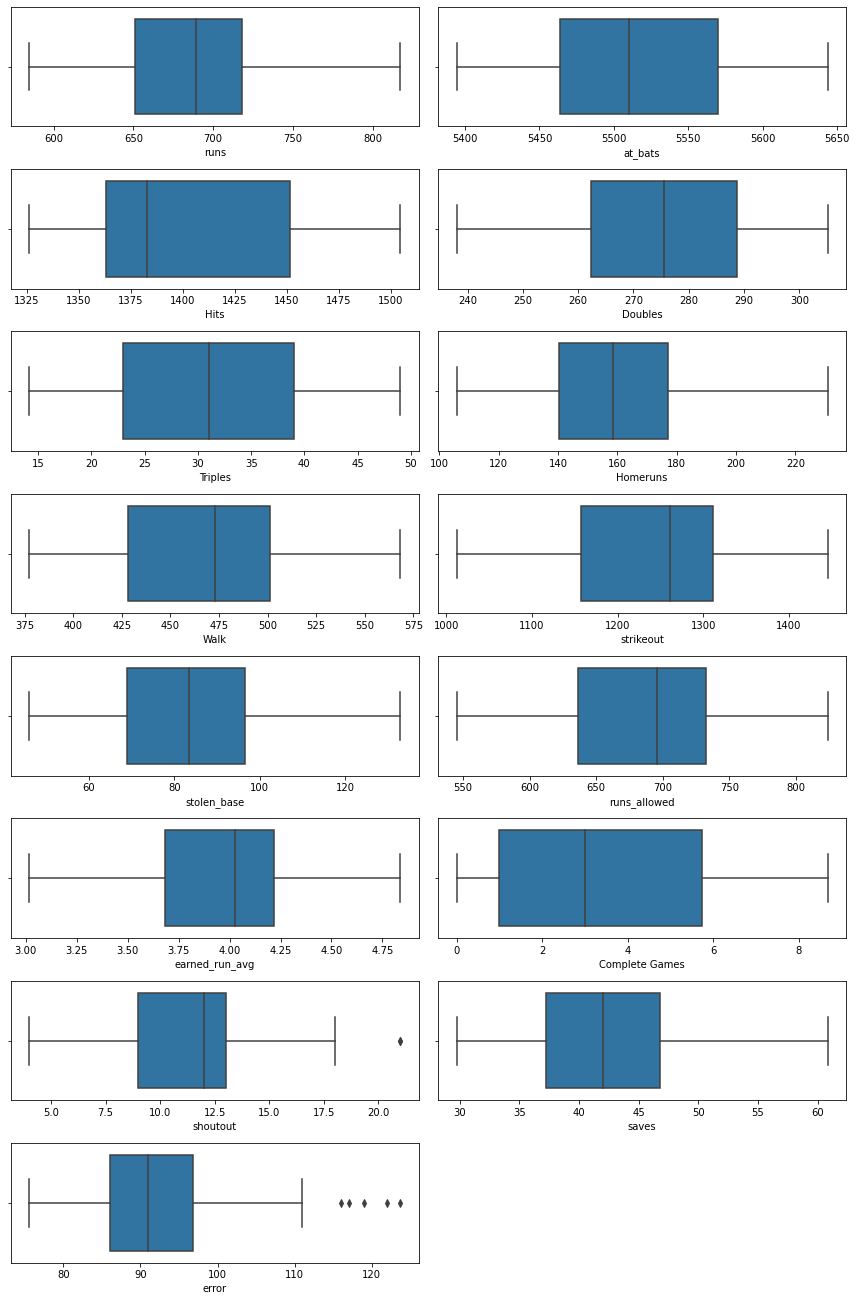

In [42]:
X_new=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_new)):
  plt.subplot(9,2,i+1)
  sns.boxplot(X[X_new[i]])
  plt.tight_layout()

# Checking skewness

In [43]:
X.skew()

runs              0.374429
at_bats           0.204423
Hits              0.648897
Doubles          -0.239246
Triples           0.156165
Homeruns          0.582027
Walk              0.160977
strikeout        -0.361504
stolen_base       0.490160
runs_allowed      0.067041
earned_run_avg   -0.074063
Complete Games    0.390283
shoutout          0.565790
saves             0.693599
error             0.860787
dtype: float64

In [44]:
x=X
X1=power_transform(X,method='yeo-johnson')
X1=pd.DataFrame(X1,columns=x.columns)

# After removal of skewness2

In [45]:
X1.skew()

runs              0.000000
at_bats           0.000000
Hits              0.000000
Doubles          -0.043478
Triples          -0.067252
Homeruns          0.000000
Walk             -0.006992
strikeout        -0.016053
stolen_base      -0.008943
runs_allowed     -0.013854
earned_run_avg   -0.013748
Complete Games   -0.094750
shoutout          0.006560
saves             0.015250
error             0.067016
dtype: float64

In [46]:
scaler=StandardScaler()
X2=scaler.fit_transform(X1)b
X2=pd.DataFrame(X2,columns=x.columns)

In [47]:
#!pip install lazypredict

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3,random_state=42)

In [49]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# training of multiple models

In [50]:
models={
    "LinearRegression":LinearRegression(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "KernelRidge":KernelRidge(),
    "MLPRegressor":MLPRegressor()
}

*************************************************** LinearRegression ************************************************************


R2_SCORE 0.6891566654379438


SCORE 0.6891566654379438


MEAN_SQUARED_ERROR 41.860235721023564


MEAN_ABSOLUTE_ERROR 5.004551573031435


RMSE 6.469948664481316


MODEL LEARNING CURVE


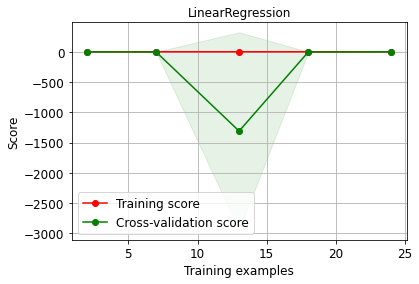

*************************************************** DecisionTreeRegressor ************************************************************


R2_SCORE 0.4513201320132013


SCORE 0.4513201320132013


MEAN_SQUARED_ERROR 73.88888888888889


MEAN_ABSOLUTE_ERROR 7.666666666666667


RMSE 8.595864638818417


MODEL LEARNING CURVE


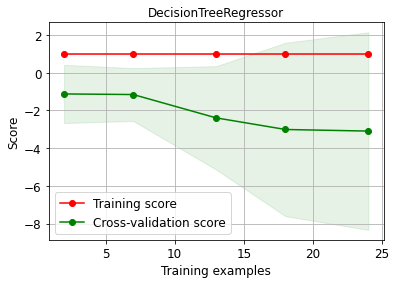

*************************************************** ExtraTreesRegressor ************************************************************


R2_SCORE 0.6773007425742577


SCORE 0.6773007425742577


MEAN_SQUARED_ERROR 43.4568333333333


MEAN_ABSOLUTE_ERROR 5.325555555555553


RMSE 6.592179710333548


MODEL LEARNING CURVE


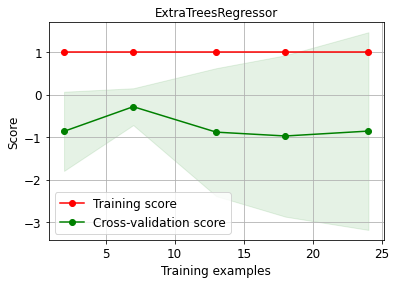

*************************************************** RandomForestRegressor ************************************************************


R2_SCORE 0.6771242574257426


SCORE 0.6771242574257426


MEAN_SQUARED_ERROR 43.480599999999995


MEAN_ABSOLUTE_ERROR 5.488888888888888


RMSE 6.593982104919606


MODEL LEARNING CURVE


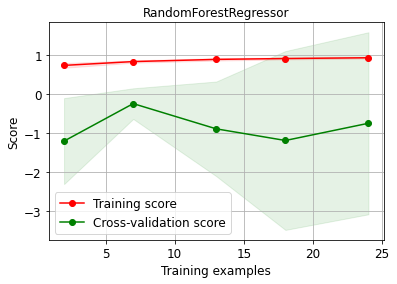

*************************************************** KernelRidge ************************************************************


R2_SCORE -79.3179483628899


SCORE -79.3179483628899


MEAN_SQUARED_ERROR 10816.150379535839


MEAN_ABSOLUTE_ERROR 101.947549913032


RMSE 104.00072297602473


MODEL LEARNING CURVE


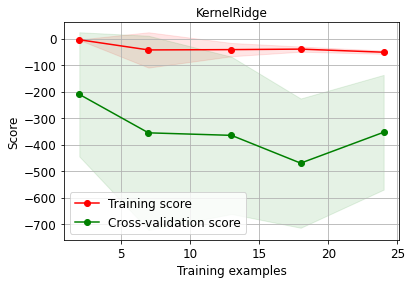

*************************************************** MLPRegressor ************************************************************


R2_SCORE -32.182508973643145


SCORE -32.182508973643145


MEAN_SQUARED_ERROR 4468.577875117277


MEAN_ABSOLUTE_ERROR 66.17422235399026


RMSE 66.84742235207933


MODEL LEARNING CURVE


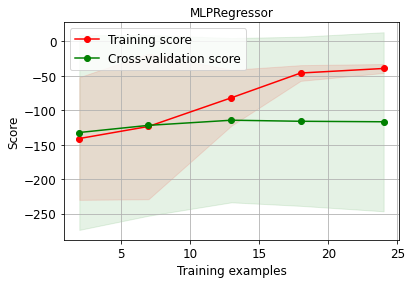

In [51]:
RMSE=[]
MSE=[]
MAE=[]
CVS=[]
R2=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  r2=r2_score(y_test,y_pred)
  R2.append(r2)
  print("R2_SCORE",r2)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  mse=mean_squared_error(y_test,y_pred)
  MSE.append(mse)
  print("\n")
  print("MEAN_SQUARED_ERROR",mse)
  print('\n')
  mae=mean_absolute_error(y_test,y_pred)
  MAE.append(mae)
  print('MEAN_ABSOLUTE_ERROR',mae)
  print('\n')
  rmse=np.sqrt(mse)
  RMSE.append(rmse)
  print("RMSE",rmse)
  print('\n')
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
  plt.show()


# cross validation in this case is not possible because dataset is too small so i chose Extratrees because of its good accuracy and metrics

R2_SCORE 0.7121759075907592

SCORE 0.7121759075907592

MEAN_SQUARED_ERROR 38.7603111111111

MEAN_ABSOLUTE_ERROR 5.231111111111111

RMSE 6.225777952281232

In [52]:
etree=ExtraTreesRegressor()
etree.fit(X_train,y_train)

ExtraTreesRegressor()

In [53]:
etree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [54]:
param={
 'bootstrap': [False,True],
 'max_depth': [None,1,2,3,4],
 'max_leaf_nodes': [None,1,2,3,4],
 'max_samples': [None,1,2,3],
 'min_impurity_split': [None,1,2,3,4],
 'min_samples_leaf': [1,None,2,3],
 'min_samples_split': [2,1,3,4]
}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
grid=GridSearchCV(estimator=etree,param_grid=param,cv=2,n_jobs=-1)

In [66]:
grid.fit(X2,y)

GridSearchCV(cv=2, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_leaf_nodes': [None, 1, 2, 3, 4],
                         'max_samples': [None, 1, 2, 3],
                         'min_impurity_split': [None, 1, 2, 3, 4],
                         'min_samples_leaf': [1, None, 2, 3],
                         'min_samples_split': [2, 1, 3, 4]})

In [67]:
grid.best_score_

0.1680894519503079

In [68]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 1,
 'max_leaf_nodes': 4,
 'max_samples': 3,
 'min_impurity_split': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

# Hyperparameter tuning

In [69]:
ETREE=ExtraTreesRegressor(bootstrap= True,
 max_depth= 3,
 max_leaf_nodes= None,
 max_samples= 3,
 min_impurity_split=1,
 min_samples_leaf= 1,
 min_samples_split= 2)

In [70]:
ETREE.fit(X_train,y_train)
ETREE.score(X_test,y_test)

0.2945803630363033

# Final model metrics

In [71]:
y_pred=ETREE.predict(X_test)
print("mean_square_error",mean_squared_error(y_pred,y_test))
print("mean_absolute_error",mean_absolute_error(y_pred,y_test))
print("Root_mean_square_error",np.sqrt(mean_squared_error(y_pred,y_test)))
print("r2_score",r2_score(y_pred,y_test))

mean_square_error 94.99651111111115
mean_absolute_error 7.96777777777778
Root_mean_square_error 9.746615366942063
r2_score -21.269124511985858


# Model graph

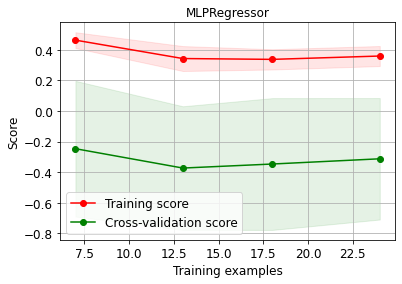

In [72]:
skplt.estimators.plot_learning_curve(ETREE,X2,y,cv=5,scoring='r2',text_fontsize='large',title=name)
plt.show()

# saving the model

In [73]:
import joblib
joblib.dump(etree,"Baseball.obj")

['Baseball.obj']

# Loading model

In [76]:
model=joblib.load('Baseball.obj')

In [77]:
model.predict(X_test)

array([80.86, 94.86, 76.97, 92.17, 92.2 , 74.48, 72.77, 67.88, 83.12])

# Conclusion

1. While doing EDA i found all the columns was having numerical value there was no object column.


2. the dataset is very small with only 30 rows so model did not get trained well because we need good amount of data to make models and do cross validation.


3. i trained a model with train test split that is giving me 71% r2_score.